# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Pedro Gonçalves
## Number: 45890

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: MNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

import pickle
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig = plt.figure(figsize=(6.5, 6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

# Question 1: 
##  Consider an MLP network with the following architecture: 
##  - an input layer able to deal with the kMNIST images.
##  - 3 hidden layers with 50 units each and with $\texttt{ReLu}$ activations.
##  - an output layer with 10 units and a softmax activation function
### a) Build this network, and compile it with the loss and the optimizer of your choice. Make sure not to include any extra layers (e.g. Dropout). Print the total number of parameters of the MLP.
### b) Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set. For this purpose use the raw data (make sure not to perform any scaling or transformation of the  data). Also include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results.
### d) Print the total number of errors and the confusion matrix for the test dataset.

## 1.a)

In [76]:
X1=X1*1.
X2=X2*1.

print('X1 -> ' + str(X1.shape))
print('X2 -> ' + str(X2.shape))

print('y1 -> ' + str(y1.shape))
print('y2 -> ' + str(y2.shape))

# Convert to binary class matrix
y1B=keras.utils.to_categorical(y1)
y2B=keras.utils.to_categorical(y2)

print('y1B -> ' + str(y1B.shape))
print('y2B -> ' + str(y2B.shape))

nn1 = keras.Sequential()
nn1.add(keras.layers.Flatten(input_shape=(28, 28)))
nn1.add(keras.layers.Dense(50, activation="relu"))
nn1.add(keras.layers.Dense(50, activation="relu"))
nn1.add(keras.layers.Dense(50, activation="relu"))
nn1.add(keras.layers.Dense(10,activation='softmax'))

nn1.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

nn1.summary()


X1 -> (10000, 28, 28)
X2 -> (5000, 28, 28)
y1 -> (10000,)
y2 -> (5000,)
y1B -> (10000, 10)
y2B -> (5000, 10)
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_95 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_96 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_97 (Dense)             (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


## 1.b)

In [77]:
train1 = nn1.fit(X1, y1B, epochs=100, batch_size=5000, validation_data=(X2, y2B)) # Use test data as validation data

Epoch 1/100
2/2 [==============================] - 0s 187ms/step - loss: 90.8886 - accuracy: 0.1010 - val_loss: 52.6249 - val_accuracy: 0.1008
Epoch 2/100
2/2 [==============================] - 0s 84ms/step - loss: 46.7054 - accuracy: 0.1188 - val_loss: 35.8871 - val_accuracy: 0.1286
Epoch 3/100
2/2 [==============================] - 0s 80ms/step - loss: 31.5227 - accuracy: 0.1566 - val_loss: 27.2226 - val_accuracy: 0.1622
Epoch 4/100
2/2 [==============================] - 0s 75ms/step - loss: 23.1535 - accuracy: 0.2044 - val_loss: 21.8021 - val_accuracy: 0.1916
Epoch 5/100
2/2 [==============================] - 0s 67ms/step - loss: 17.9948 - accuracy: 0.2473 - val_loss: 17.9133 - val_accuracy: 0.2214
Epoch 6/100
2/2 [==============================] - 0s 79ms/step - loss: 14.4426 - accuracy: 0.2909 - val_loss: 15.2053 - val_accuracy: 0.2470
Epoch 7/100
2/2 [==============================] - 0s 73ms/step - loss: 11.8863 - accuracy: 0.3323 - val_loss: 13.1640 - val_accuracy: 0.2738
Epoch

## 1.c)

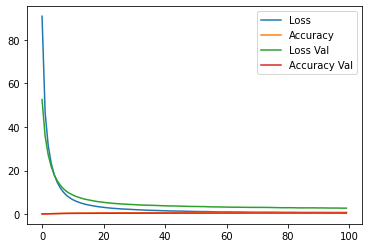

In [78]:
h1 = train1.history
plt.plot(h1["loss"])
plt.plot(h1["accuracy"])
plt.plot(h1["val_loss"])
plt.plot(h1["val_accuracy"])
plt.legend(['Loss', 'Accuracy', 'Loss Val', 'Accuracy Val'])

# <span style="color:blue">Comentários</span>
#### Destaca-se imediatamente o facto de a curva da Accuracy não aumentar e manter-se nula. Contudo, a curva de Loss diminui progressivamente e estabiliza a certa altura. Este tipo de curva evidencia o fenómeno 'Good fit' (fenómeno que ocorre quando o modelo construído é apropriado ao tipo de dados e o tempo de treino é razoável).

## 1.d)

Errors: 2419
Confusion matrix, without normalization
None


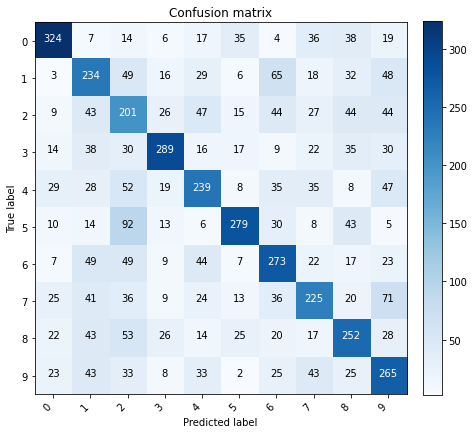

In [79]:
yOut1 = nn1.predict(X2)
ytestPred1 = np.argmax(yOut1, axis=1)
print('Errors:', np.sum(y2 != ytestPred1))
print(plot_confusion_matrix(confusion_matrix(y2, ytestPred1), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

<hr style="border:2px solid black"> </hr>

# Question 2
## Consider a MLP network with the same architecture of the MLP from the previous question. The only difference being the input layer.
### a) Pre-process the data using the function  $\texttt{PCA(withen=True)}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 250 principal componentes of the data. Use the pre-processed data in the following items.
### b)  Build this network, and compile it with the loss and the optimizer used in the previous question.  Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set and include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results. Also print the total number of errors and the confusion matrix for the test dataset.

## 2.a)

In [80]:
from sklearn.decomposition import PCA

X1r = X1.reshape(10000, 784)
X2r = X2.reshape(5000, 784)

print('X1r -> ' + str(X1r.shape))
print('X2r -> ' + str(X2r.shape))

pca = PCA(n_components=250,whiten=True).fit(X1r)
X1p = pca.transform(X1r)
X2p = pca.transform(X2r)

print('X1p -> ' + str(X1p.shape))
print('X2p -> ' + str(X2p.shape))

print('Nº of Principal Components kept: %d'%X1p.shape[1])

X1r -> (10000, 784)
X2r -> (5000, 784)
X1p -> (10000, 250)
X2p -> (5000, 250)
Nº of Principal Components kept: 250


## 2.b)

In [81]:
nn2 = keras.Sequential()
nn2.add(keras.layers.Flatten(input_shape=(250,)))
nn2.add(keras.layers.Dense(50, activation="relu"))
nn2.add(keras.layers.Dense(50, activation="relu"))
nn2.add(keras.layers.Dense(50, activation="relu"))
nn2.add(keras.layers.Dense(10, activation='softmax'))

nn2.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

nn2.summary()

train2 = nn2.fit(X1p, y1B, epochs=100, batch_size=5000, validation_data=(X2p, y2B)) # Use test data as validation data

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 250)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 50)                12550     
_________________________________________________________________
dense_99 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_100 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_101 (Dense)            (None, 10)                510       
Total params: 18,160
Trainable params: 18,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 154ms/step - loss: 2.4093 - accuracy: 0.0979 - val_loss: 2.37

## 2.c)

Errors: 1880
Confusion matrix, without normalization
None


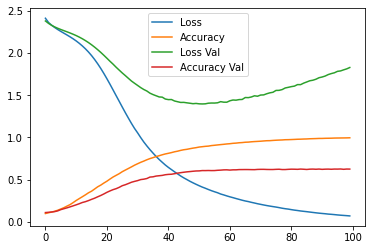

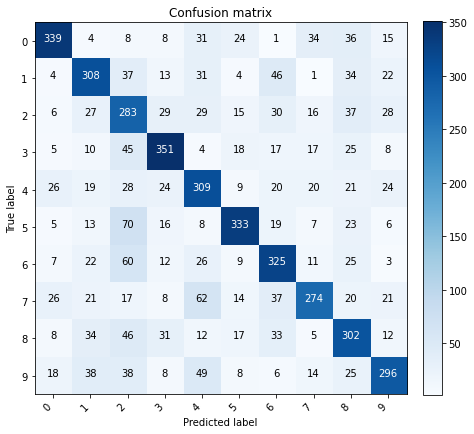

In [82]:
h2 = train2.history
plt.plot(h2["loss"])
plt.plot(h2["accuracy"])
plt.plot(h2["val_loss"])
plt.plot(h2["val_accuracy"])
plt.legend(['Loss', 'Accuracy', 'Loss Val', 'Accuracy Val'])

yOut2 = nn2.predict(X2p)
ytestPred2=np.argmax(yOut2, axis=1)
print('Errors:', np.sum(y2 != ytestPred2))
print(plot_confusion_matrix(confusion_matrix(y2, ytestPred2), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))


# <span style="color:blue">Comentários</span>
#### Com o pré-processamento com recurso ao PCA, já é possível observar um aumento progressivo da Accuracy, resultando num número menor de erros em geral. Note-se também que a curva de Loss associada ao conjunto de validação, por volta do 50º epoch, volta a subir, o que não se verifica na curva de Loss associada ao conjunto de treino. Este fenómeno traduz um comportamento de memorização por parte do modelo, e não de aprendizagem. Pode ser um sinal de que o modelo sofre de "Over fit".

<hr style="border:2px solid black"> </hr>

# Question 3
## Consider a MLP network an architecture of your choice, using any type of layers, activation functions or other parameters  that might imporve the results. You can also perform any type of pre-processing of the $\texttt{kMNISTsmall}$ data if it helps improve performance. Train and test this new network. Make sure the test results are better than in the previous 2 questions.

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1r)
X1s = sc.transform(X1r)
X2s = sc.transform(X2r)

print('X1s -> ' + str(X1s.shape))
print('X2s -> ' + str(X2s.shape))

X1s -> (10000, 784)
X2s -> (5000, 784)


In [84]:
nn3 = keras.Sequential()
nn3.add(keras.layers.Flatten(input_shape=(784,)))
nn3.add(keras.layers.Dense(128, activation="relu"))
nn3.add(keras.layers.Dense(64, activation="relu"))
nn3.add(keras.layers.Dense(10, activation='softmax'))

nn3.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

train3 = nn3.fit(X1s, y1B, epochs=100, batch_size=5000, validation_data=(X2s, y2B)) # Use test data as validation data

Epoch 1/100
2/2 [==============================] - 0s 193ms/step - loss: 2.5203 - accuracy: 0.1271 - val_loss: 2.1802 - val_accuracy: 0.2050
Epoch 2/100
2/2 [==============================] - 0s 82ms/step - loss: 1.9536 - accuracy: 0.3222 - val_loss: 1.9177 - val_accuracy: 0.3434
Epoch 3/100
2/2 [==============================] - 0s 90ms/step - loss: 1.5991 - accuracy: 0.5094 - val_loss: 1.7204 - val_accuracy: 0.4456
Epoch 4/100
2/2 [==============================] - 0s 82ms/step - loss: 1.3300 - accuracy: 0.6209 - val_loss: 1.5603 - val_accuracy: 0.5050
Epoch 5/100
2/2 [==============================] - 0s 84ms/step - loss: 1.1257 - accuracy: 0.6876 - val_loss: 1.4357 - val_accuracy: 0.5418
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.9697 - accuracy: 0.7271 - val_loss: 1.3311 - val_accuracy: 0.5706
Epoch 7/100
2/2 [==============================] - 0s 68ms/step - loss: 0.8466 - accuracy: 0.7624 - val_loss: 1.2385 - val_accuracy: 0.6060
Epoch 8/100
2/2 [==

Errors: 1006
Confusion matrix, without normalization
None


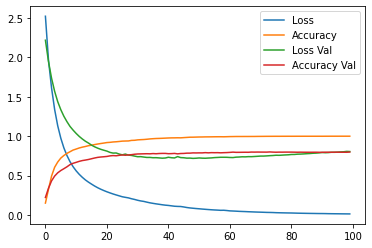

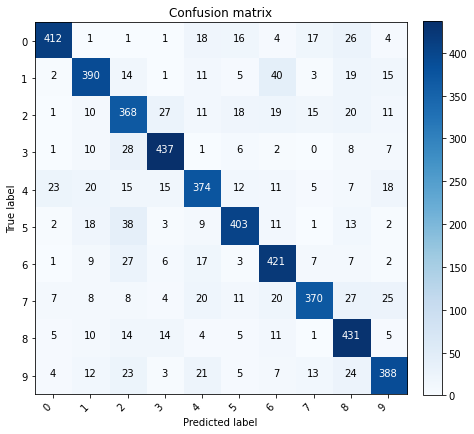

In [74]:
h3 = train3.history
plt.plot(h3["loss"])
plt.plot(h3["accuracy"])
plt.plot(h3["val_loss"])
plt.plot(h3["val_accuracy"])
plt.legend(['Loss', 'Accuracy', 'Loss Val', 'Accuracy Val'])

yOut3 = nn3.predict(X2s)
ytestPred3=np.argmax(yOut3, axis=1)
print('Errors:', np.sum(y2 != ytestPred3))
print(plot_confusion_matrix(confusion_matrix(y2, ytestPred3), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

# <span style="color:blue">Comentários</span>
#### Ao retirar 1 hidden layer (mantendo duas) e alterar o número de neurónios para 128 e 64 (para a hidden layer 1 e 2, respetivamente), verifica-se uma melhoria no que diz respeito ao número total de erros. Além disso, ao reduzir a complexidade do modelo, a curva de Loss associada ao conjunto de validação manteve-se mais estável ao longo das iterações. Conclui-se que o modelo anterior sofria de "Over fit".